# <p style="background-color: #f5df18; padding: 10px;"> Foundations of Astronomical Data Science | **Visualization** </p>

<div style="display: flex;">
    <div style="flex: 1; margin-right: 100px;">
        <h2>Questions</h2>
        <ul>
            <li>What elements make a compelling visualization that authentically reports scientific results ready for scientific presentation and publication?</li>
            <li>What tools and techinques are available to save time on creating presentation and publication-ready figures?</li>
        </ul>
    </div>
    <div style="flex: 1;">
        <h2>Learning Objectives</h2>
        <ul>
            <li>Design a figure that tells a compelling story.</li>
            <li>Use Matplotlib features to customize the appearance of figures.</li>
            <li>Generate a figure with multiple subplots.</li>
        </ul>
    </div>
</div>


In the previous lesson, we selected photometry data from Pan-STARRS
and used it to identify stars we think are likely to be in GD-1.

In this episode, we will take the results from previous episodes and use
them to make a figure that tells a compelling scientific story.

# Outline
---

1. Starting with the figure from the previous episode, we will add
  annotations to present the results more clearly.

2. Then we will learn several ways to customize figures to make them more
  appealing and effective.

3. Finally, we will learn how to make a figure with multiple panels.

This imports previously imported functions:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon

from episode_functions import *

The following code loads in the data (instructions for downloading data can be
found in the [setup instructions](../learners/setup.md)).  You may need to add a the path
to the filename variable below (e.g. `filename = 'student_download/backup-data/gd1_data.hdf'`)

In [2]:
filename = 'gd1_data.hdf'
winner_df = pd.read_hdf(filename, 'winner_df')

centerline_df = pd.read_hdf(filename, 'centerline_df')
candidate_df = pd.read_hdf(filename, 'candidate_df')
loop_df = pd.read_hdf(filename, 'loop_df')


This defines previously defined quantities:

In [21]:


pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

pm1_rect, pm2_rect = make_rectangle(
    pm1_min, pm1_max, pm2_min, pm2_max)


# Making Figures That Tell a Story
--- 

The figures we have made so far have been "quick and dirty".  Mostly we
have used Matplotlib's default style, although we have adjusted a few
parameters, like `markersize` and `alpha`, to improve legibility.

Now that the analysis is done, it is time to think more about:

1. Making professional-looking figures that are ready for publication.

2. Making figures that communicate a scientific result clearly and compellingly.

Not necessarily in that order.



We will start by reviewing Figure 1 from the original paper.  We have seen
the individual panels, but now we will look at the whole figure, along
with the caption:


<div>
<img src="https://datacarpentry.org/astronomy-python/fig/gd1-5.png
" width="1100"/>
</div>


## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (10 Minutes) </p>
---

Think about the following questions:

1. What is the primary scientific result of this work?

2. What story is this figure telling?

3. In the design of this figure, can you identify 1 or 2 choices the
  authors made that you think are effective?  Think about big-picture
  elements, like the number of panels and how they are arranged, as well
  as details like the choice of typeface.

4. Can you identify 1 or 2 elements that could be improved, or that you
  might have done differently?

No figure is perfect, and everyone can be a critic. Here are some topics that could come up in this discussion:

1. The primary result is that adding physical selection criteria makes it possible to separate likely candidates from the background more effectively than in previous work, which makes it possible to see the structure of GD-1 in "unprecedented detail," allowing the authors to detect that the stream is larger than previously observed.

2. The figure documents the selection process as a sequence of reproducible steps, containing enough information for a skeptical reader to understand the authors' choices. Reading right-to-left, top-to-bottom, we see selection based on proper motion, the results of the first selection, selection based on stellar surface properties (color and magnitude), and the results of the second selection. So this figure documents the methodology, presents the primary result, and serves as reference for other parts of the paper (and presumably, talk, if this figure is reused for colloquia).

3. The figure is mostly black and white, with minimal use of color, and mostly uses large fonts. It will likely work well in print and only needs a few adjustments to be accessible to low vision readers and none to accommodate those with poor color vision. The annotations in the bottom left panel guide the reader to the results discussed in the text.

4. The panels that can have the same units, dimensions, and their axes are aligned, do.

5. The on-sky positions likely do not need so much white space.

6. Axes ticks for the on-sky position figures are not necessary since this is not in an intuitive coordinate system or a finder chart. Instead, we would suggest size bar annotations for each dimension to give the reader the needed scale.

7. The text annotations could be darker for more contrast and appear only over white background to increase accessibility

8. The legend in the bottom right panel has a font too small for low-vision readers. At the very least, those details (and the isochrone line) could be called out in the caption.
  

# Plotting GD-1 with Annotations
---

The lower left panel in the paper uses three other features to present the
results more clearly and compellingly:

- A vertical dashed line to distinguish the previously undetected
  region of GD-1,

- A label that identifies the new region, and

- Several annotations that combine text and arrows to identify features of GD-1.

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (20 Minutes) </p>
---

Plot the selected stars in `winner_df` using the `plot_cmd_selection` function and then
choose any or all of these features and add them to the figure:

- To draw vertical lines, see
  [`plt.vlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html)
  and
  [`plt.axvline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html).

- To add text, see
  [`plt.text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

- To add an annotation with text and an arrow, see [`plt.annotate`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html).

Here is some [additional information about text and
arrows](https://matplotlib.org/stable/tutorials/text/annotations.html).


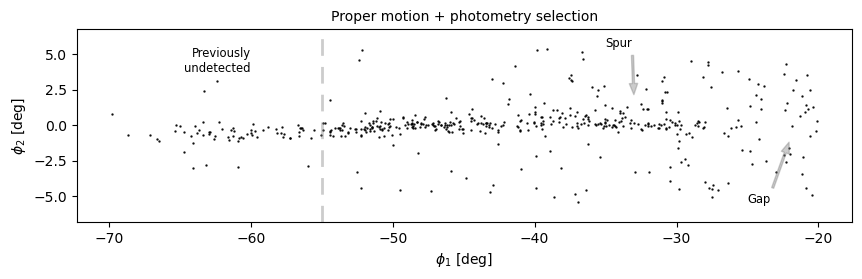

In [4]:
fig = plt.figure(figsize=(10,2.5))
plot_cmd_selection(winner_df)
plt.axvline(-55, ls='--', color='gray', 
            alpha=0.4, dashes=(6,4), lw=2)
plt.text(-60, 5.5, 'Previously\nundetected', 
         fontsize='small', ha='right', va='top')

arrowprops=dict(color='gray', shrink=0.05, width=1.5, 
                headwidth=6, headlength=8, alpha=0.4)

plt.annotate('Spur', xy=(-33, 2), xytext=(-35, 5.5),
             arrowprops=arrowprops,
             fontsize='small')

plt.annotate('Gap', xy=(-22, -1), xytext=(-25, -5.5),
             arrowprops=arrowprops,
             fontsize='small');

# Customization
---

Matplotlib provides a default style that determines things like the
colors of lines, the placement of labels and ticks on the axes, and
many other properties.

There are several ways to override these defaults and customize your figures:

- To customize only the current figure, you can call functions like
  `tick_params`, which we will demonstrate below.

- To customize all figures in a notebook, you can use `rcParams`.

- To override more than a few defaults at the same time, you can use a
  style sheet.

As a simple example, notice that Matplotlib puts ticks on the outside
of the figures by default, and only on the left and bottom sides of
the axes.

## 🔔  **Note on Accessibility**
---

Customization offers a high degree of personalization for creating scientific visualizations.
It is important to also create accessible visualizations for a broad audience
that may include low-vision or color-blind individuals. The AAS Journals provide a Graphics Guide
for authors with tips and external links that can help you produce more accessible graphics:
[https://journals.aas.org/graphics-guide/](https://journals.aas.org/graphics-guide/) 

So far, everything we have wanted to do we could call directly from
the pyplot module with `plt.`. As you do more and more customization
you may need to run some methods on plotting objects themselves. To use the
method that changes the direction of the ticks we need an `axes` object.
So far, Matplotlib has implicitly created our `axes` object when we called `plt.plot`.
To explicitly create an `axes` object we can first create our `figure` object and then add an `axes` object
to it.

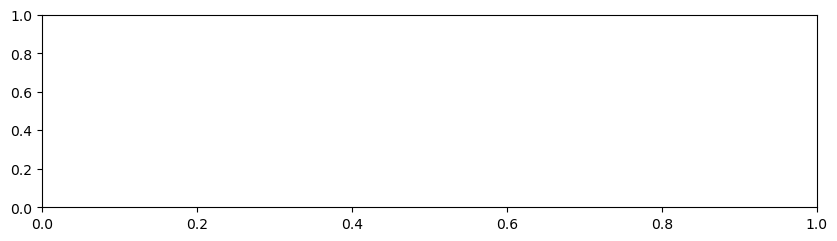

In [5]:
### Explicitly create figure and axes objects ### 

fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)



## 🔔 `subplot` and `axes`
---

Confusingly, in Matplotlib the objects `subplot` and `axes` are often used interchangeably.
This is because a `subplot` is an `axes` object with additional methods and attributes.

You can use the [`add_subplot`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) method to add more than one `axes` object to a figure.
For this reason you have to specify the total number of columns, total number of rows, and which plot number you are
creating (`fig.add_subplot(ncols, nrows, pltnum)`). The plot number starts in the upper left corner and goes left to
right and then top to bottom. In the example above we have one column, one row, and we're plotting into the first plot space.

Now we are ready to change the direction of the ticks to the inside of the axes using our new
axes object.

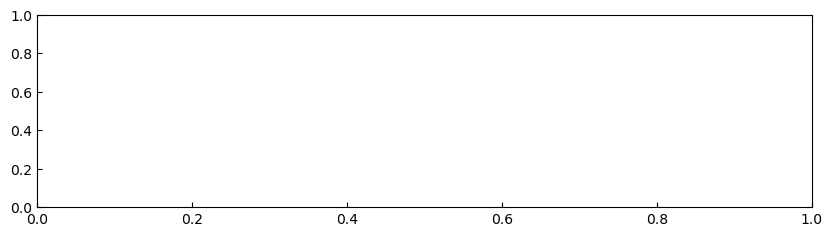

In [6]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)
ax.tick_params(direction='in')

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>
---


Read the documentation of
[`tick_params`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)
and use it to put ticks on the top and right sides of the axes.

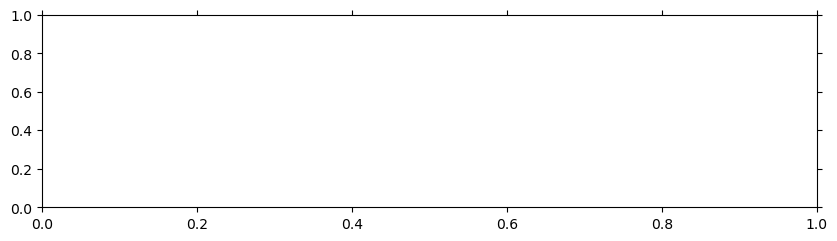

In [7]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)
ax.tick_params(top=True, right=True)

# rcParams
---

If you want to make a customization that applies to all figures in a
notebook, you can use `rcParams`. When you import Matplotlib, a dictionary is created with default values
for everything you can change about your plot. This is what you are overriding with `tick_params` above.

Here is an example that reads the current font size from `rcParams`:

In [8]:
plt.rcParams['font.size']

10.0

And sets it to a new value:


In [9]:
plt.rcParams['font.size'] = 14

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>
---

Plot the previous figure again, and see what font
sizes have changed.  Look up any other element of `rcParams`, change
its value, and check the effect on the figure.

black


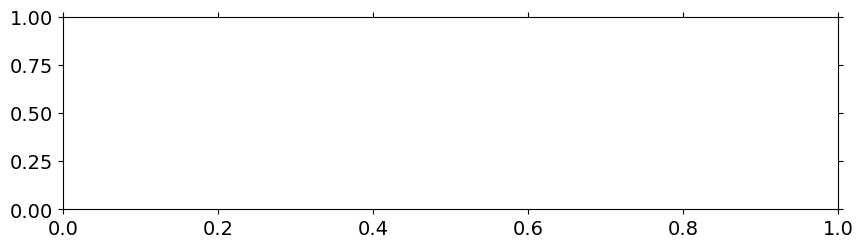

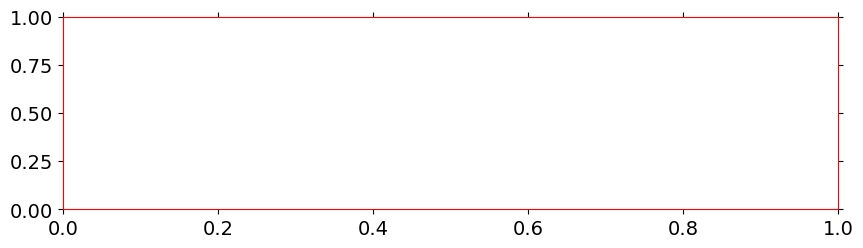

In [10]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)
ax.tick_params(top=True, right=True)

# Looking up the 'axes.edgecolor' rcParams value
print(plt.rcParams['axes.edgecolor'])

plt.rcParams['axes.edgecolor'] = 'red'

fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)
ax.tick_params(top=True, right=True)

# changing the rcParams value back to its original value
plt.rcParams['axes.edgecolor'] = 'black'

When you import Matplotlib, `plt.rcParams` is populated from a matplotlibrc file.
If you want to permanently change a setting for every plot you make, you can set that in your matplotlibrc file.
To find out where your matplotlibrc file lives type:

In [11]:
import matplotlib as mpl
mpl.matplotlib_fname()

'/Users/tb/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'

If the file doesn't exist, you can download [a sample matplotlibrc file](https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlibrc-sample) to modify.

## Style sheets

It is possible that you would like multiple sets of defaults, for example,
one default for plots for scientific papers and another for talks or posters.
Because the `matplotlibrc` file is read when you import Matplotlib, it is
not easy to switch from one set of options to another.

The solution to this problem is style sheets, [which you can read
about
here](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

Matplotlib provides a set of predefined style sheets, or you can make your own.
The [style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) shows a gallery of plots generated by common style sheets.

You can display a list of style sheets installed on your system.

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Note that `seaborn-paper`, `seaborn-talk` and `seaborn-poster` are
particularly intended to prepare versions of a figure with text sizes
and other features that work well in papers, talks, and posters.

To use any of these style sheets, run `plt.style.use` like this:

In [13]:
plt.style.use('fivethirtyeight')

The style sheet you choose will affect the appearance of all figures
you plot after calling `use`, unless you override any of the options
or call `use` again.

## 🔔 Return to Default
---

To switch back to the default style use

```python
plt.style.use('default')
```

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>
---

Choose one of the styles on the list and select it by
calling `use`.  Then go back and plot one of the previous figures to see
what changes in the figure's appearance.

In [22]:
### Read in 'gd1_isochrone.hdf5' ### 

filename = 'gd1_isochrone.hdf5'
iso_df = pd.read_hdf(filename, 'iso_df')
iso_df.head()

g_all = iso_df['mag_g']

g_mask = (g_all > 18.0) & (g_all < 21.5)
g_mask.sum()

iso_masked = iso_df[g_mask]
iso_masked.head()

g = iso_masked['mag_g']
left_color = iso_masked['color_g_i'] - 0.06
right_color = iso_masked['color_g_i'] + 0.12

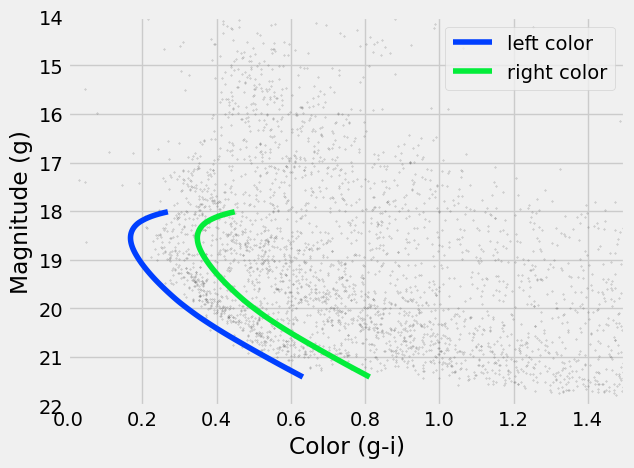

In [25]:
plt.style.use('seaborn-v0_8-bright')

plot_cmd(candidate_df)
plt.plot(left_color, g, label='left color')
plt.plot(right_color, g, label='right color')

plt.legend();

## Multiple panels
---

So far we have been working with one figure at a time, but the figure we
are replicating contains multiple panels. We will create each of these
panels as a different subplot.
Matplotlib has multiple functions for making figures with multiple panels.
We have already used [`add_subplot`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) - however, this creates equal sized panels.
For this reason, we will use [`subplot2grid`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot2grid.html) which allows us to control the relative sizes of the panels.

Since we have already written functions that generate each panel of this figure,
we can now create the full multi-panel figure by creating each subplot and then run our plotting function.

Like [`add_subplot`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot),
[`subplot2grid`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot2grid.html)
requires us to specify the total number of columns and rows in the grid (this time as a tuple called
`shape`), and the location of the subplot (`loc`) - a tuple identifying the location in the grid we
are about to fill.

In this example, `shape` is `(2, 2)` to create two rows and two columns.

For the first panel, `loc` is `(0, 0)`, which indicates row 0 and
column 0, which is the upper-left panel.

Here is how we use this function to draw the four panels.


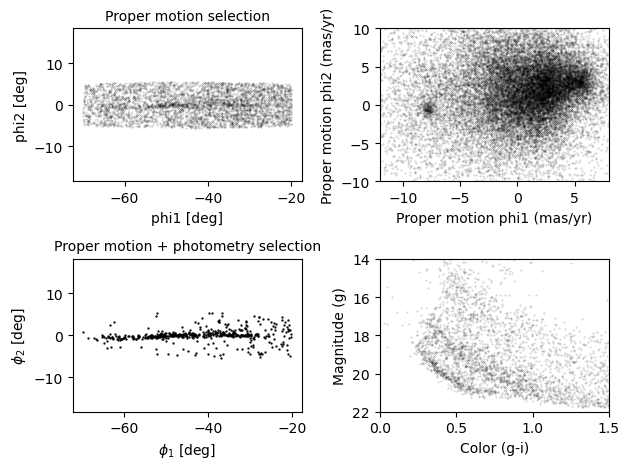

In [26]:

plt.style.use('default')

fig = plt.figure()
shape = (2, 2)
ax1 = plt.subplot2grid(shape, (0, 0))
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 1))
plot_proper_motion(centerline_df)

ax3 = plt.subplot2grid(shape, (1, 0))
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 1))
plot_cmd(candidate_df)

plt.tight_layout()


We use
[`plt.tight_layout`](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html)
at the end, which adjusts the sizes of the panels to make sure the
titles and axis labels don't overlap. Notice how convenient it is that we have written functions to plot each panel.
This code is concise and readable: we can tell what is being plotted in each panel thanks to our explicit function names and
we know what function to investigate if we want to see the mechanics of exactly how the plotting is done.


## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>
---

What happens if you leave out `tight_layout`?

Without `tight_layout` the space between the panels is too small. In this situation, the titles from the lower plots overlap
with the x-axis labels from the upper panels and the axis labels from the right-hand panels overlap with the plots in the
left-hand panels.

## Adjusting proportions
---

In the previous figure, the panels are all the same size.  To get a
better view of GD-1, we would like to stretch the panels on the left and
compress the ones on the right.

To do that, we will use the `colspan` argument to make a panel that
spans multiple columns in the grid. To do this we will need more columns so we will
change the `shape` from (2,2) to (2,4).

The panels on the left span three columns, so they are three times
wider than the panels on the right.

At the same time, we use `figsize` to adjust the aspect ratio of the
whole figure.

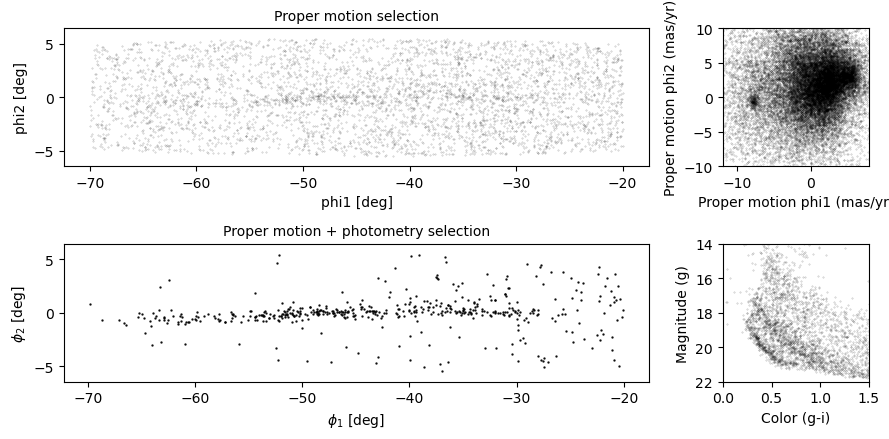

In [27]:
plt.figure(figsize=(9, 4.5))

shape = (2, 4)
ax1 = plt.subplot2grid(shape, (0, 0), colspan=3)
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 3))
plot_proper_motion(centerline_df)

ax3 = plt.subplot2grid(shape, (1, 0), colspan=3)
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 3))
plot_cmd(candidate_df)

plt.tight_layout()

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>

In this example, the ratio of the widths of the panels is 3:1.  How
would you adjust it if you wanted the ratio to be 3:2?

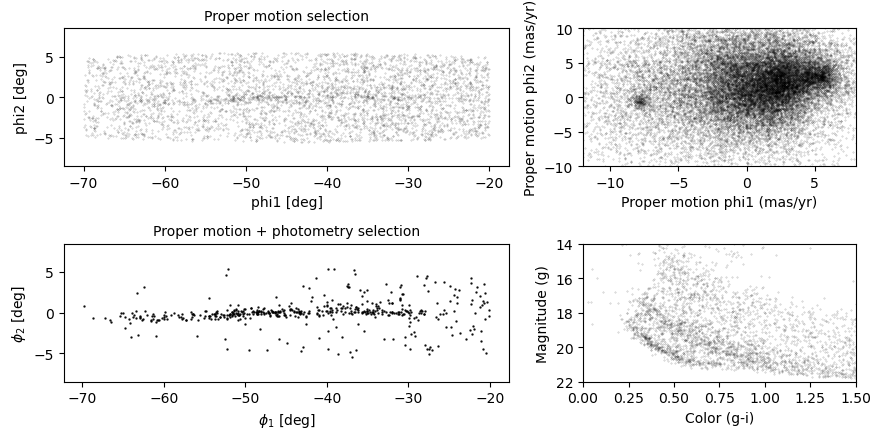

In [28]:
plt.figure(figsize=(9, 4.5))

shape = (2, 5)                                   # CHANGED
ax1 = plt.subplot2grid(shape, (0, 0), colspan=3)
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 3), colspan=2)       # CHANGED
plot_proper_motion(centerline_df)

ax3 = plt.subplot2grid(shape, (1, 0), colspan=3)
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 3), colspan=2)       # CHANGED
plot_cmd(candidate_df)

plt.tight_layout()

## Adding the shaded regions
---
The one thing our figure is missing is the shaded regions showing the stars selected by proper motion and around
the isochrone in the color magnitude diagram.

In episode 4 we defined a rectangle in proper motion space around the stars in GD-1.
We stored the x-values of the vertices of this rectangle in `pm1_rect` and
the y-values as `pm2_rect`.

To plot this rectangle, we will use the Matplotlib `Polygon` object which we used in episode 7 to check which
points were inside the polygon. However, this time we will be plotting the `Polygon`.

To create a `Polygon`, we have to put the coordinates of the rectangle in an array with
`x` values in the first column and `y` values in the second column.

In [29]:
vertices = np.transpose([pm1_rect, pm2_rect])
vertices

array([[-8.9, -2.2],
       [-8.9,  1. ],
       [-6.9,  1. ],
       [-6.9, -2.2],
       [-8.9, -2.2]])

We will now create the `Polygon`, specifying its display properties which will be used when it is plotted.
We will specify `closed=True` to make sure the shape is closed, `facecolor='orange` to color the inside
of the `Polygon` orange, and `alpha=0.4` to make the `Polygon` semi-transparent.

In [30]:
poly = Polygon(vertices, closed=True, 
                   facecolor='orange', alpha=0.4)

Then to plot the `Polygon` we call the `add_patch` method. `add_patch` like `tick_params`
must be called on an `axes` or `subplot` object, so we will create a `subplot` and then
add the `Patch` to the `subplot`.

(-10.0, 10.0)

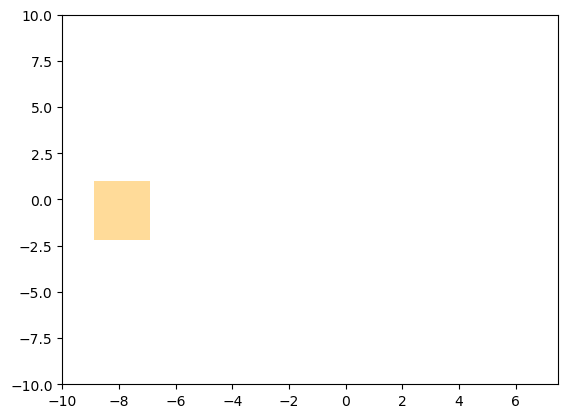

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poly = Polygon(vertices, closed=True, 
                   facecolor='orange', alpha=0.4)
ax.add_patch(poly)
ax.set_xlim(-10, 7.5)
ax.set_ylim(-10, 10)

We can now call our plot\_proper\_motion function to plot the
proper motion for each star, and the add a shaded `Polygon` to show the
region we selected.

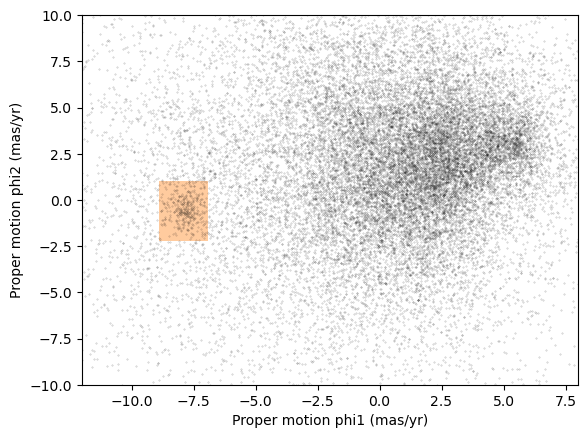

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plot_proper_motion(centerline_df)
poly = Polygon(vertices, closed=True, 
               facecolor='C1', alpha=0.4)
ax.add_patch(poly)

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>

Add a few lines to be run after the `plot_cmd` function to show the polygon we selected as a
shaded area.

Hint: pass `loop_df` as an argument to `Polygon` as we did in episode 7 and then plot it using `add_patch`.

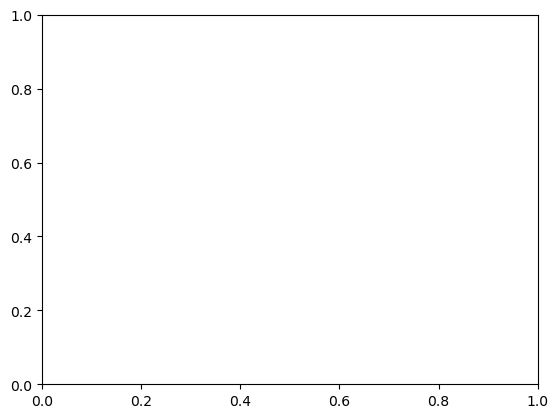

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poly_cmd = Polygon(loop_df, closed=True, 
              facecolor='C1', alpha=0.4)
ax.add_patch(poly_cmd)

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>

Add the `Polygon` patches you just created to the right panels of the four panel figure.

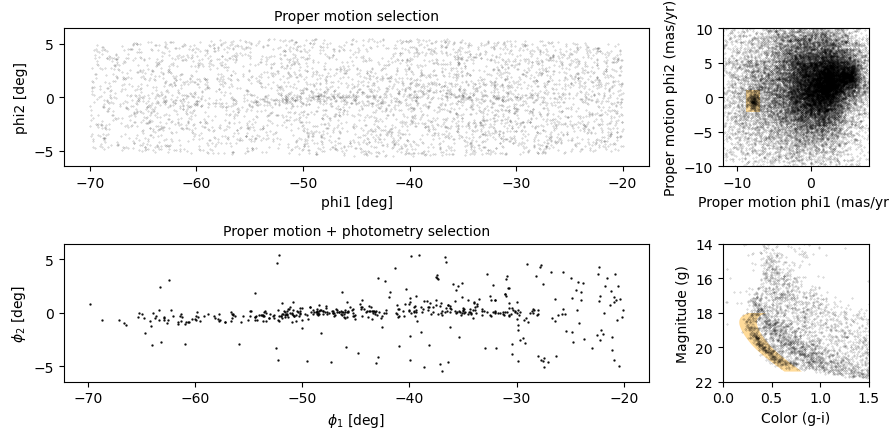

In [34]:
fig = plt.figure(figsize=(9, 4.5))

shape = (2, 4)
ax1 = plt.subplot2grid(shape, (0, 0), colspan=3)
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 3))
plot_proper_motion(centerline_df)
poly = Polygon(vertices, closed=True,
               facecolor='orange', alpha=0.4)
ax2.add_patch(poly)

ax3 = plt.subplot2grid(shape, (1, 0), colspan=3)
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 3))
plot_cmd(candidate_df)
poly_cmd = Polygon(loop_df, closed=True, 
               facecolor='orange', alpha=0.4)
ax4.add_patch(poly_cmd)

plt.tight_layout()

# Summary

---

In this episode, we reverse-engineered the figure we have been
replicating, identifying elements that seem effective and others that
could be improved.

We explored features Matplotlib provides for adding annotations to
figures -- including text, lines, arrows, and polygons -- and several
ways to customize the appearance of figures.  And we learned how to
create figures that contain multiple panels.

# <p style="background-color: #f5df18; padding: 10px;"> 🗝️ Key Points </p>

---

- Effective figures focus on telling a single story clearly and authentically. The major decisions needed in creating an effective summary figure like this one can be done away from a computer and built up from low fidelity (hand drawn) to high (tweaking rcParams, etc.).
- Consider using annotations to guide the reader’s attention to the most important elements of a figure, while keeping in mind accessiblity issues that such detail may introduce.
- The default Matplotlib style generates good quality figures, but there are several ways you can override the defaults.
- If you find yourself making the same customizations on several projects, you might want to create your own style sheet.
